In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()

from sklearn.preprocessing import OrdinalEncoder
ode=OrdinalEncoder()

from sklearn.model_selection import train_test_split
# for classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [16]:
df=pd.read_csv("D:\\synthetic_asthma_dataset.csv")
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,0,580.6,18.7,0,NaN
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,0,415.9,25.0,0,NaN


In [17]:
df.isna().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

In [18]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [19]:
df['Allergies']=df['Allergies'].fillna(df['Allergies'].mode()[0])

In [20]:
df['Comorbidities']=df['Comorbidities'].fillna(df['Comorbidities'].mode()[0])

In [21]:
df['Asthma_Control_Level']=df.groupby('Physical_Activity_Level')['Asthma_Control_Level'].transform(lambda x:x.fillna(x.mode()[0]))

In [22]:
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Not Controlled
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Not Controlled
2,ASTH100002,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,Diabetes,0.38,0,303.3,15.3,0,Not Controlled
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,Diabetes,0.82,3,535.0,27.7,0,Not Controlled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,Dust,Low,Sedentary,Indoor,Diabetes,0.67,0,580.6,18.7,0,Not Controlled
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,Not Controlled
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,Diabetes,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,Diabetes,0.44,0,415.9,25.0,0,Not Controlled


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                10000 non-null  object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            10000 non-null  object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

### Visualization

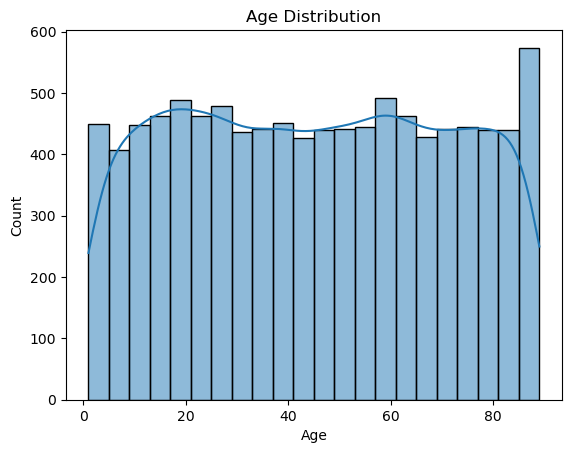

In [24]:
# Age distribution 
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

#### it shows us which age groups have most people in the dataset.
#### it helps us to know which age group is affected  more

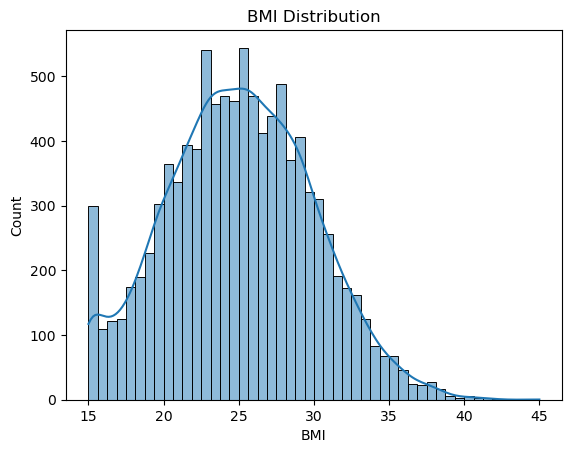

In [25]:
# BMI distribution
sns.histplot(df['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()

#### Shows high risk bmi groups
#### the peak of the distribution is between 25 and 30 this shows that largest number of people in the group fall in to the overweight category

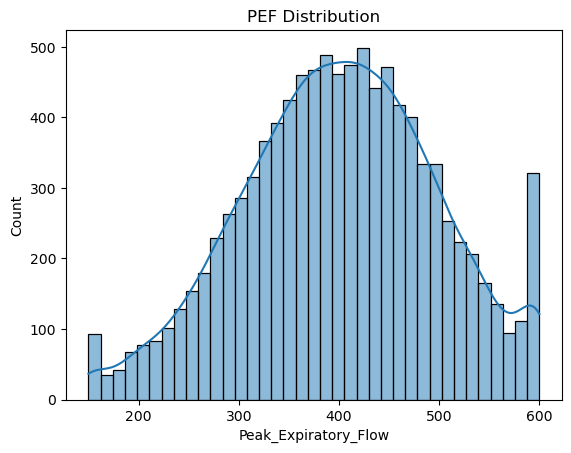

In [12]:
# peak expiratory flow 
sns.histplot(df['Peak_Expiratory_Flow'], kde=True)
plt.title("PEF Distribution")
plt.show()

#### most people have a normal breathing capacity ranging from 400 to 450,but there is strange group whose breathing capacity is exactly 600

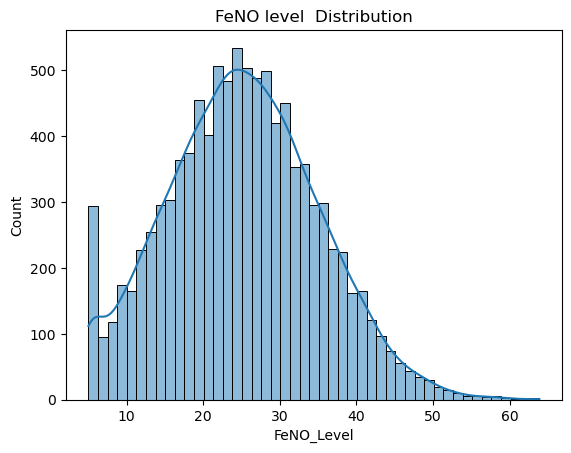

In [13]:
# feno level histogram
sns.histplot(df['FeNO_Level'], kde=True)
plt.title("FeNO level  Distribution")
plt.show()

#### it is centere on (30 to 35),data shows large separate groups with very high and very low  levels of airway inflammation

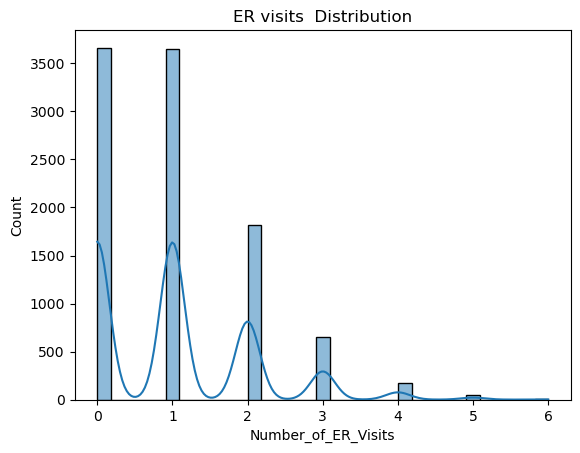

In [14]:
# ER visits
sns.histplot(df['Number_of_ER_Visits'], kde=True)
plt.title("ER visits  Distribution")
plt.show()

#### majority have 0 or 1 ER visits ,both visits the highest with over 3500 people

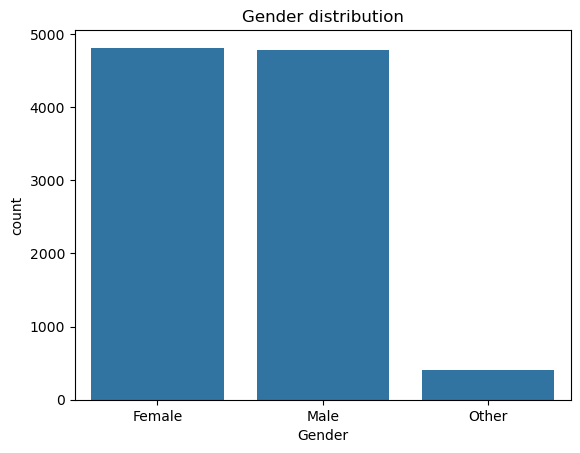

In [99]:
#gemder count plot
sns.countplot(data=df,x='Gender')
plt.title("Gender distribution")
plt.show()

#### males and female have same amount of distributions,but only a small amount in the other gender category

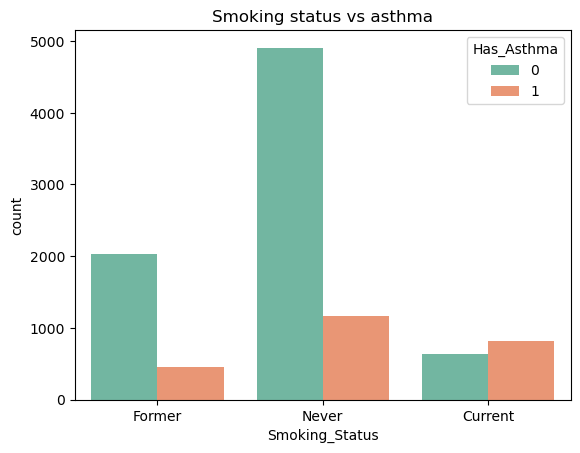

In [100]:
# smoking status count plot
sns.countplot(data=df,x='Smoking_Status',hue='Has_Asthma',palette='Set2')
plt.title("Smoking status vs asthma")
plt.show()

#### the majority of individuals who have never smoked do not have asthma,while current smokers have high asthma compared to the former and never smoking groups

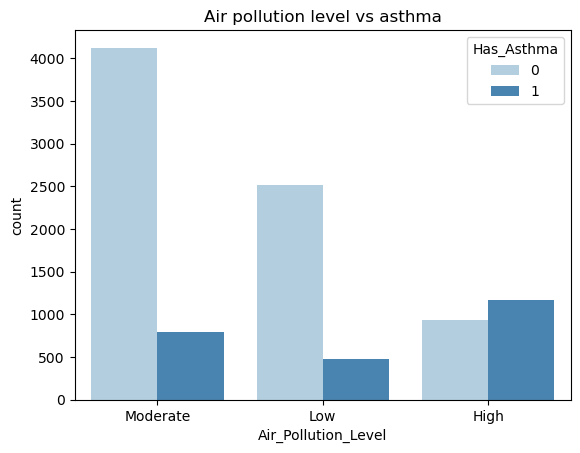

In [101]:
# air pollution count plot
sns.countplot(data=df,x='Air_Pollution_Level',hue='Has_Asthma',palette='Blues')
plt.title("Air pollution level vs asthma")
plt.show()

#### among this three category ,the high air pollution level  group has highest percentage of individuals with asthma

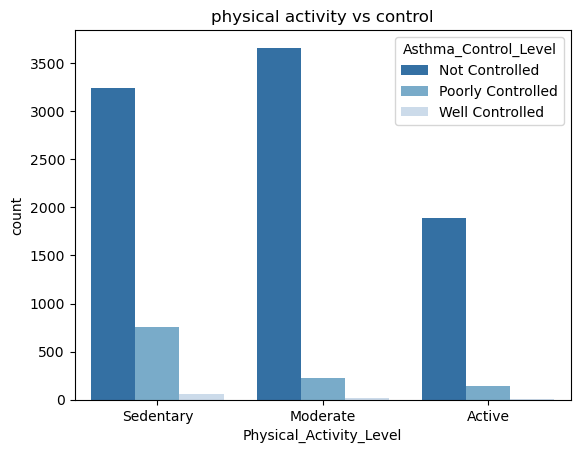

In [102]:
# physical activity level count plot
sns.countplot(data=df,x='Physical_Activity_Level',hue='Asthma_Control_Level',palette='Blues_r')
plt.title("physical activity vs control")
plt.show()

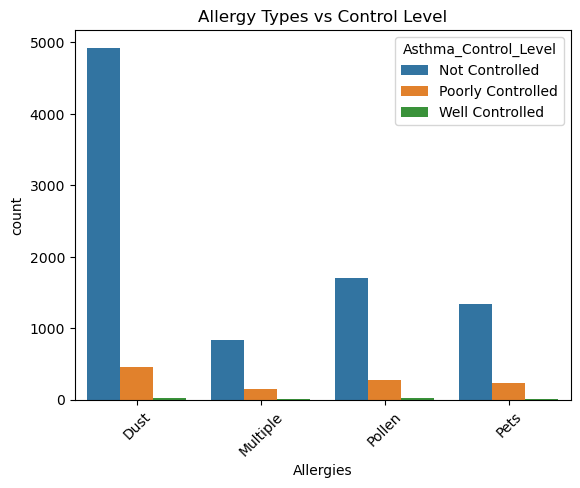

In [103]:
# allergy type count plot
sns.countplot(data=df, x='Allergies', hue='Asthma_Control_Level')
plt.xticks(rotation=45)
plt.title("Allergy Types vs Control Level")
plt.show()

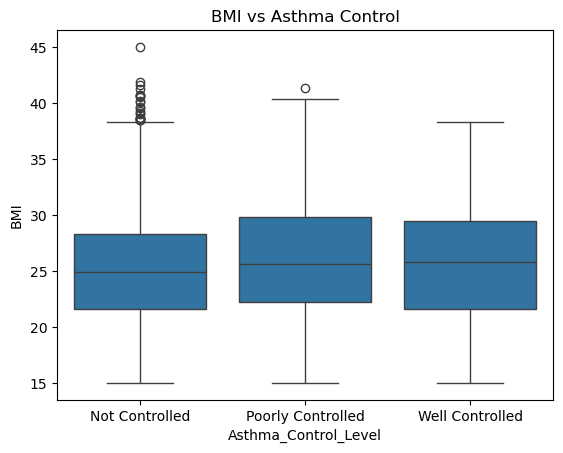

In [104]:
# BMI vs asthma control
sns.boxplot(data=df, x='Asthma_Control_Level', y='BMI')
plt.title("BMI vs Asthma Control")
plt.show()

#### individuals with well controlled asthma have the lowest bmi in this dataset,and the lower bmi means better asthma control

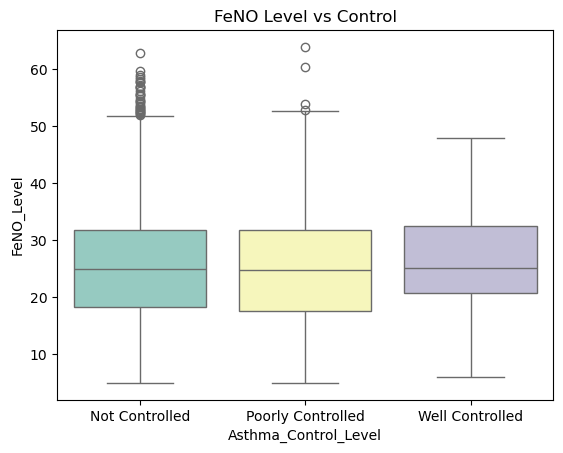

In [105]:
# feno level vs asthma control level
sns.boxplot(data=df, x='Asthma_Control_Level', y='FeNO_Level',palette='Set3')
plt.title("FeNO Level vs Control")
plt.show()

#### poorly controlled amd not controlled asthama have the highest feno levels,while well controlled asthma have the lowest feno levels

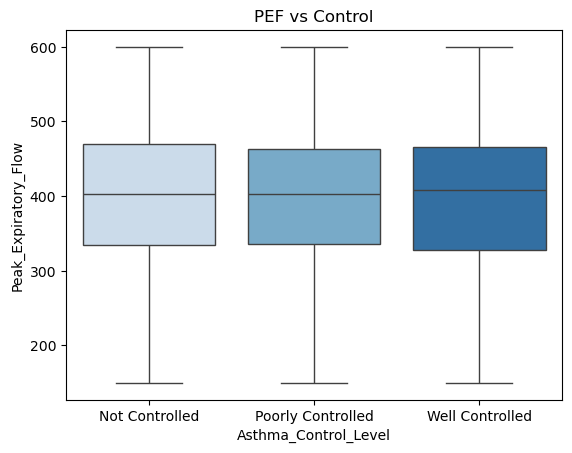

In [106]:
# PEF(peak expliratory flow) vs asthma control level
sns.boxplot(data=df,x='Asthma_Control_Level',y='Peak_Expiratory_Flow',palette='Blues')
plt.title("PEF vs Control")
plt.show()

#### the PEF is very similar and high across all asthma control levels

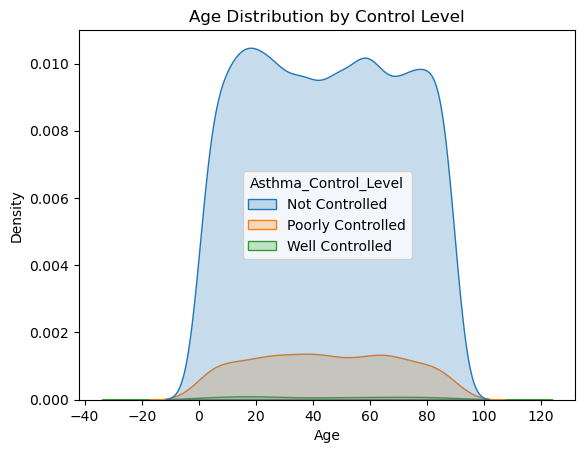

In [107]:
#age kde by asthma control
sns.kdeplot(data=df, x='Age', hue='Asthma_Control_Level', fill=True)
plt.title("Age Distribution by Control Level")
plt.show()

#### it is wide and peak in the middle aged to older adult range,but unknown prevents us from seeing if older people have better or worse controlled asthma or younger people

#### Asthma is strongly influenced by lifestyle factors, medical indicators, and environmental conditions — not just age or gender.

    *   Low activity → more asthma
	•	High pollution → more asthma
	•	High FeNO → definitely asthma
	•	Low PEFR → uncontrolled asthma
	•	Smokers → more asthma
	•	Allergies → more asthma

### Encoding

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                10000 non-null  object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            10000 non-null  object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [27]:
category_cols=df.select_dtypes(include='object').columns

In [28]:
category_cols

Index(['Patient_ID', 'Gender', 'Smoking_Status', 'Allergies',
       'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type',
       'Comorbidities', 'Asthma_Control_Level'],
      dtype='object')

In [29]:
df['Physical_Activity_Level'].unique()

array(['Sedentary', 'Moderate', 'Active'], dtype=object)

In [30]:
df['Asthma_Control_Level'].unique()

array(['Not Controlled', 'Poorly Controlled', 'Well Controlled'],
      dtype=object)

In [31]:
df['Air_Pollution_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [32]:
df['Smoking_Status'].unique()

array(['Former', 'Never', 'Current'], dtype=object)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = [
    "Physical_Activity_Level",
    "Air_Pollution_Level",
    "Smoking_Status",
    "Asthma_Control_Level"
]
categories=[
    ["Sedentary", "Moderate", "Active"],
    ["Low", "Moderate", "High"],
    ["Never", "Former", "Current"],
    ["Not Controlled", "Poorly Controlled", "Well Controlled"]
]
oe=OrdinalEncoder(categories=categories)
df[ordinal_cols]=oe.fit_transform(df[ordinal_cols])

In [34]:
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,1.0,1,Dust,1.0,0.0,Outdoor,Diabetes,0.38,0,421.0,46.0,0,0.0
1,ASTH100001,15,Male,24.6,1.0,0,Dust,0.0,1.0,Indoor,Both,0.60,2,297.6,22.9,0,0.0
2,ASTH100002,72,Female,17.6,0.0,0,Dust,1.0,1.0,Indoor,Diabetes,0.38,0,303.3,15.3,0,0.0
3,ASTH100003,61,Male,16.8,0.0,0,Multiple,2.0,0.0,Outdoor,Both,0.60,1,438.0,40.1,1,1.0
4,ASTH100004,21,Male,30.2,0.0,0,Dust,1.0,2.0,Indoor,Diabetes,0.82,3,535.0,27.7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,0.0,0,Dust,0.0,0.0,Indoor,Diabetes,0.67,0,580.6,18.7,0,0.0
9996,ASTH109996,78,Female,24.8,0.0,0,Pollen,0.0,1.0,Indoor,Diabetes,0.72,1,417.6,40.8,0,0.0
9997,ASTH109997,58,Male,30.1,1.0,1,Pollen,0.0,1.0,Indoor,Diabetes,0.28,0,459.1,20.3,1,0.0
9998,ASTH109998,88,Female,31.2,1.0,0,Pollen,1.0,1.0,Indoor,Diabetes,0.44,0,415.9,25.0,0,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  float64
 5   Family_History           10000 non-null  int64  
 6   Allergies                10000 non-null  object 
 7   Air_Pollution_Level      10000 non-null  float64
 8   Physical_Activity_Level  10000 non-null  float64
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            10000 non-null  object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [36]:
nominal_cols=['Gender','Allergies','Occupation_Type','Comorbidities']

enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_data=enc.fit_transform(df[nominal_cols])

new_cols=enc.get_feature_names_out(nominal_cols)

encoded_df=pd.DataFrame(encoded_data,columns=new_cols,index=df.index)

df=pd.concat([df.drop(columns=nominal_cols),encoded_df],axis=1)

In [37]:
df

,Patient_ID,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,ASTH100000,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,ASTH100001,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,ASTH100002,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,ASTH100003,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,ASTH100004,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,ASTH109996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,ASTH109997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,ASTH109998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [38]:
df.drop(columns=['Patient_ID'],inplace=True)

In [39]:
df

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,46.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,22.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,15.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,40.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,27.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,18.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,40.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,20.3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### ML Models

#### logistic regression

In [40]:
#feature selection
x=df.drop(columns=['Has_Asthma'])

In [41]:
x

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,46.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,22.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,15.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,40.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,27.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,18.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,40.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,20.3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [42]:
y=df['Has_Asthma']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Has_Asthma, Length: 10000, dtype: int64

In [43]:
# split the data into train or test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(8000, 23)
(2000,)


In [44]:
#model train
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=model1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
y_test

6252    0
4684    0
1731    0
4742    1
4521    0
       ..
6412    0
8285    0
7853    0
1095    0
6929    0
Name: Has_Asthma, Length: 2000, dtype: int64

In [47]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [48]:
# matric table-which display the number of correctly predicted value and incorrected predicted values
conf_metrics=confusion_matrix(y_test,y_pred)
print("confusion matric is :\n",conf_metrics)

confusion matric is :
 [[1452   52]
 [  88  408]]


In [49]:
# % of how many correct prediction were made
#TP+TN/TP+TN+FP+FN
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.93


In [50]:
class_rep=classification_report(y_test,y_pred)
print("classifiction Report is :\n",class_rep)

classifiction Report is :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1504
           1       0.89      0.82      0.85       496

    accuracy                           0.93      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.93      0.93      0.93      2000



### Decision tree classifier

In [51]:
#feature selection
x=df.drop(columns=['Has_Asthma'])
x

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,46.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,22.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,15.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,40.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,27.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,18.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,40.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,20.3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [52]:
y=df['Has_Asthma']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Has_Asthma, Length: 10000, dtype: int64

In [53]:
#train the decision Tree classifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
# split the data into train or test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(8000, 23)
(2000,)


In [55]:
#make prediction
y_pred=model.predict(x_test)
print("Prediction:",y_pred)

Prediction: [0 0 0 ... 0 0 0]


In [56]:
#calculate accuracy 
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.971


In [57]:
class_rep=classification_report(y_test,y_pred)
print("classifiction Report is :\n",class_rep)

classifiction Report is :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1504
           1       0.94      0.95      0.94       496

    accuracy                           0.97      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.97      0.97      0.97      2000



In [58]:
conf_metrics=confusion_matrix(y_test,y_pred)
print("confusion matric is :\n",conf_metrics)

confusion matric is :
 [[1472   32]
 [  26  470]]


In [59]:
x_scaled[0]

array([ 0.27558178,  0.52247923,  0.63128864,  1.51524879,  0.12478735,
       -1.05732606, -0.52490841, -0.99547953,  0.20626152,  2.12390587,
       -0.35859418,  1.03791841, -0.95807792, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375, -1.54035103,  1.54035103,
       -0.33073464,  0.65527721, -0.50281094])

In [60]:
new=model.predict([[ 0.27558178,  0.52247923,  0.63128864,  1.51524879,  0.12478735,
       -1.05732606, -0.52490841, -0.99547953,  0.20626152,  2.12390587,
       -0.35859418,  1.03791841, -0.95807792, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375, -1.54035103,  1.54035103,
       -0.33073464,  0.65527721, -0.50281094]])
new

array([1])

### Random forest classifier

In [61]:
#feature selection
x=df.drop(columns=['Has_Asthma'])
x

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,46.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,22.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,15.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,40.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,27.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,18.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,40.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,20.3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [62]:
y=df['Has_Asthma']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Has_Asthma, Length: 10000, dtype: int64

In [63]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(8000, 23)
(2000,)


In [64]:
# train the random forest classifier
rf_model= RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [65]:
#make prediction
y_pred=rf_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
y_test

6252    0
4684    0
1731    0
4742    1
4521    0
       ..
6412    0
8285    0
7853    0
1095    0
6929    0
Name: Has_Asthma, Length: 2000, dtype: int64

In [67]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[1498    6]
 [  42  454]]


In [68]:
print("Accuracy score",accuracy_score(y_test,y_pred))
print("\nClassification report:\n",classification_report(y_test,y_pred))

Accuracy score 0.976

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1504
           1       0.99      0.92      0.95       496

    accuracy                           0.98      2000
   macro avg       0.98      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [69]:
x_scaled[1]

array([-1.16678533, -0.09300355,  0.63128864, -0.65995763, -1.28843291,
        0.26980593,  0.45375097,  0.96431874, -1.05903902, -0.22372854,
       -0.35859418, -0.96346687,  1.04375644, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375,  0.64920267, -0.64920267,
        3.02357203, -1.52607169, -0.50281094])

In [70]:
new=rf_model.predict([[-1.16678533, -0.09300355,  0.63128864, -0.65995763, -1.28843291,
        0.26980593,  0.45375097,  0.96431874, -1.05903902, -0.22372854,
       -0.35859418, -0.96346687,  1.04375644, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375,  0.64920267, -0.64920267,
        3.02357203, -1.52607169, -0.50281094]])
new

array([0])

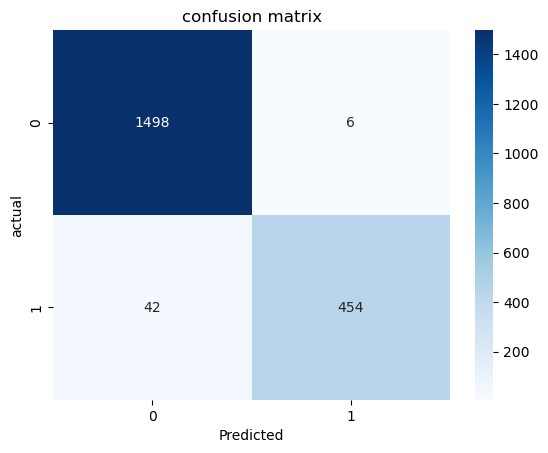

In [71]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()

### Knn Regressor

In [72]:
#feature selection
x=df.drop(columns=['Has_Asthma'])
x

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,46.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,22.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,15.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,40.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,27.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,18.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,40.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,20.3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [73]:
y=df['Has_Asthma']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Has_Asthma, Length: 10000, dtype: int64

In [74]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_test.shape)

(8000, 23)
(2000,)


In [75]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
#prediction
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 1])

In [77]:
y_test

6252    0
4684    0
1731    0
4742    1
4521    0
       ..
6412    0
8285    0
7853    0
1095    0
6929    0
Name: Has_Asthma, Length: 2000, dtype: int64

In [78]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[1498    6]
 [  42  454]]


In [79]:
print("Accuracy score",accuracy_score(y_test,y_pred))

Accuracy score 0.976


In [80]:
print("\nClassification report:\n",classification_report(y_test,y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1504
           1       0.99      0.92      0.95       496

    accuracy                           0.98      2000
   macro avg       0.98      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [81]:
x_scaled[0]

array([ 0.27558178,  0.52247923,  0.63128864,  1.51524879,  0.12478735,
       -1.05732606, -0.52490841, -0.99547953,  0.20626152,  2.12390587,
       -0.35859418,  1.03791841, -0.95807792, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375, -1.54035103,  1.54035103,
       -0.33073464,  0.65527721, -0.50281094])

In [82]:
new=knn.predict([[0.27558178,  0.52247923,  0.63128864,  1.51524879,  0.12478735,
       -1.05732606, -0.52490841, -0.99547953,  0.20626152,  2.12390587,
       -0.35859418,  1.03791841, -0.95807792, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375, -1.54035103,  1.54035103,
       -0.33073464,  0.65527721, -0.50281094]])
new

array([0])

### SVC

In [83]:
#feature selection
x=df.drop(columns=['Has_Asthma'])
x

,Age,BMI,Smoking_Status,Family_History,Air_Pollution_Level,Physical_Activity_Level,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,...,Gender_Other,Allergies_Dust,Allergies_Multiple,Allergies_Pets,Allergies_Pollen,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
0,52,27.6,1.0,1,1.0,0.0,0.38,0,421.0,46.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15,24.6,1.0,0,0.0,1.0,0.60,2,297.6,22.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,72,17.6,0.0,0,1.0,1.0,0.38,0,303.3,15.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,61,16.8,0.0,0,2.0,0.0,0.60,1,438.0,40.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21,30.2,0.0,0,1.0,2.0,0.82,3,535.0,27.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0.0,0,0.0,0.0,0.67,0,580.6,18.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,78,24.8,0.0,0,0.0,1.0,0.72,1,417.6,40.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,58,30.1,1.0,1,0.0,1.0,0.28,0,459.1,20.3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,88,31.2,1.0,0,1.0,1.0,0.44,0,415.9,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [84]:
y=df['Has_Asthma']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Has_Asthma, Length: 10000, dtype: int64

In [85]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)


In [86]:
x_scaled

array([[ 0.27558178,  0.52247923,  0.63128864, ..., -0.33073464,
         0.65527721, -0.50281094],
       [-1.16678533, -0.09300355,  0.63128864, ...,  3.02357203,
        -1.52607169, -0.50281094],
       [ 1.05523967, -1.52913003, -0.73306978, ..., -0.33073464,
         0.65527721, -0.50281094],
       ...,
       [ 0.50947915,  1.03538154,  0.63128864, ..., -0.33073464,
         0.65527721, -0.50281094],
       [ 1.67896599,  1.26105856,  0.63128864, ..., -0.33073464,
         0.65527721, -0.50281094],
       [-1.24475112, -1.77532314,  0.63128864, ..., -0.33073464,
         0.65527721, -0.50281094]])

In [87]:
#train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_test.shape)

(8000, 23)
(2000,)


In [88]:
model=SVC(kernel='poly',class_weight='balanced')
model.fit(x_train,y_train)

SVC(class_weight='balanced', kernel='poly')

In [89]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
acc=accuracy_score(y_test,y_pred)
acc

0.9475

In [91]:
conf_metrics=confusion_matrix(y_test,y_pred)
conf_metrics

array([[1427,   77],
       [  28,  468]])

In [92]:
class_rep=classification_report(y_test,y_pred)
print("classifiction Report is :\n",class_rep)

classifiction Report is :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1504
           1       0.86      0.94      0.90       496

    accuracy                           0.95      2000
   macro avg       0.92      0.95      0.93      2000
weighted avg       0.95      0.95      0.95      2000



In [93]:
x_scaled[2]

array([ 1.05523967, -1.52913003, -0.73306978, -0.65995763,  0.12478735,
        0.26980593, -0.52490841, -0.99547953, -1.00059321, -0.99611043,
       -0.35859418,  1.03791841, -0.95807792, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375,  0.64920267, -0.64920267,
       -0.33073464,  0.65527721, -0.50281094])

In [94]:
new=model.predict([[ 1.05523967, -1.52913003, -0.73306978, -0.65995763,  0.12478735,
        0.26980593, -0.52490841, -0.99547953, -1.00059321, -0.99611043,
       -0.35859418,  1.03791841, -0.95807792, -0.20412415,  0.92017502,
       -0.33351849, -0.43399785, -0.49984375,  0.64920267, -0.64920267,
       -0.33073464,  0.65527721, -0.50281094]])
new

array([0])

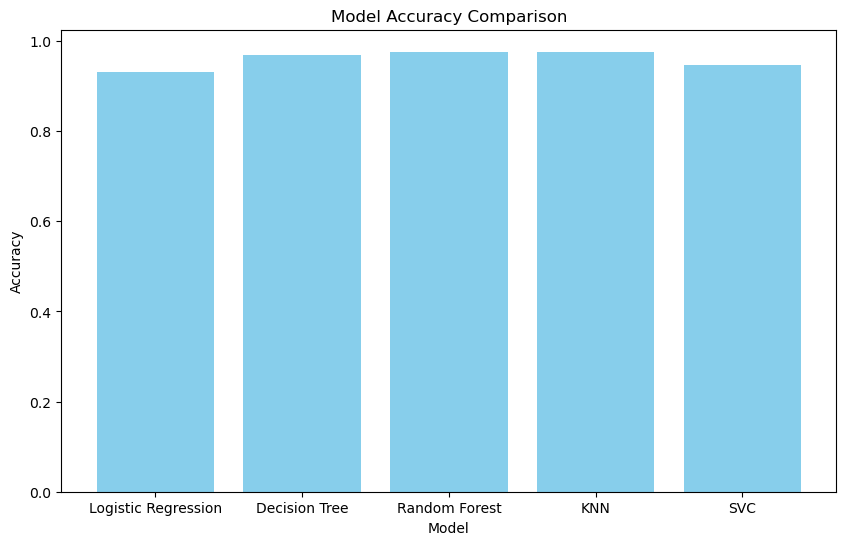

In [95]:
#accuracy bar graph
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']
accuracies =  [0.93,  0.969, 0.976, 0.976, 0.9475]  

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
#plt.ylim(0, 1)  # Set y-axis from 0 to 1 for accuracy
plt.show()

In [96]:
x.columns

Index(['Age', 'BMI', 'Smoking_Status', 'Family_History', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Medication_Adherence',
       'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level',
       'Asthma_Control_Level', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Allergies_Dust', 'Allergies_Multiple', 'Allergies_Pets',
       'Allergies_Pollen', 'Occupation_Type_Indoor', 'Occupation_Type_Outdoor',
       'Comorbidities_Both', 'Comorbidities_Diabetes',
       'Comorbidities_Hypertension'],
      dtype='object')

<Axes: >

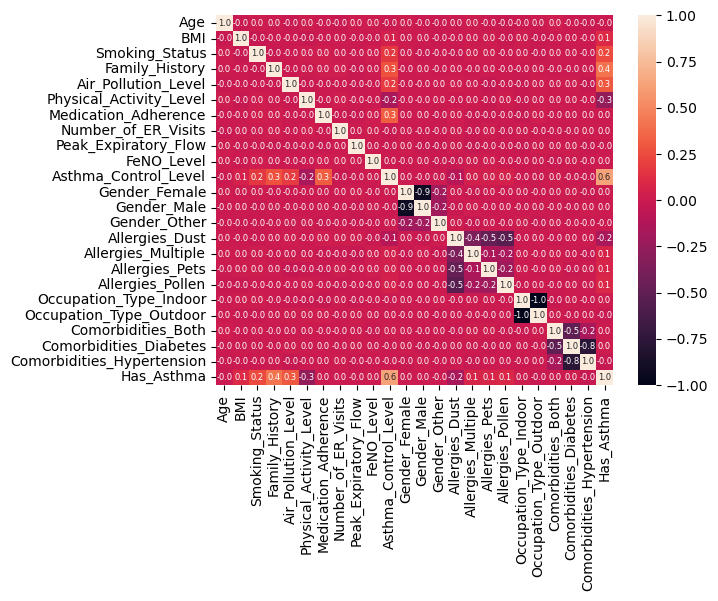

In [98]:
sns.heatmap(df[['Age', 'BMI', 'Smoking_Status', 'Family_History', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Medication_Adherence',
       'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level',
       'Asthma_Control_Level', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Allergies_Dust', 'Allergies_Multiple', 'Allergies_Pets',
       'Allergies_Pollen', 'Occupation_Type_Indoor', 'Occupation_Type_Outdoor',
       'Comorbidities_Both', 'Comorbidities_Diabetes',
       'Comorbidities_Hypertension','Has_Asthma']].corr(),annot=True,annot_kws={'size':6},fmt= '.1f')